# **STATISTICS FOR DATA SCIENCE ASSIGNMENT**

#### **Objective**: _Cleaning, analysing, visualising, forecasting and presentation of data_

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv('./data_w_genres.csv')

data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.00000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Weird Al"" Yankovic",0.176934,0.664788,218165.25760,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,"['antiviral pop', 'comedy rock', 'comic', 'par..."
2,$IMEON,0.242300,0.806667,66307.33333,0.469000,0.000001,0.204333,-12.168000,0.482667,106.020000,0.592000,62.666667,6,0,6,[]
3,$NOT,0.547000,0.750125,152929.50000,0.519750,0.043137,0.213975,-8.878500,0.276725,114.229125,0.319500,64.625000,6,1,8,"['east coast hip hop', 'gangster rap', 'hardco..."
4,$pyda,0.000122,0.514000,331240.00000,0.899000,0.079300,0.367000,-5.115000,0.060200,174.028000,0.266000,58.000000,7,1,1,[]


In [78]:
len(data)
# Approx 22k songs data

22727


## Popularity Trends

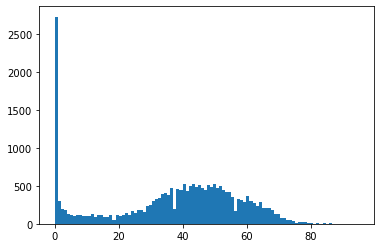

In [79]:
y = data['popularity']
freq, bin_edge, plot = plt.hist(y, bins = 100)

#### We can immediately see that popularity seems to be almost normally distributed but there is a spike at 0 which might be due to data not being available. Hence these rows should be dropped when analysing 

In [80]:
len(data[data['popularity']==0])

2387

In [81]:
data.drop(data[data['popularity']==0].index, inplace=True)

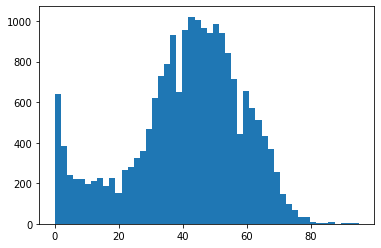

In [82]:
y = data['popularity']
freq, bin_edge, plot = plt.hist(y, bins = 50)

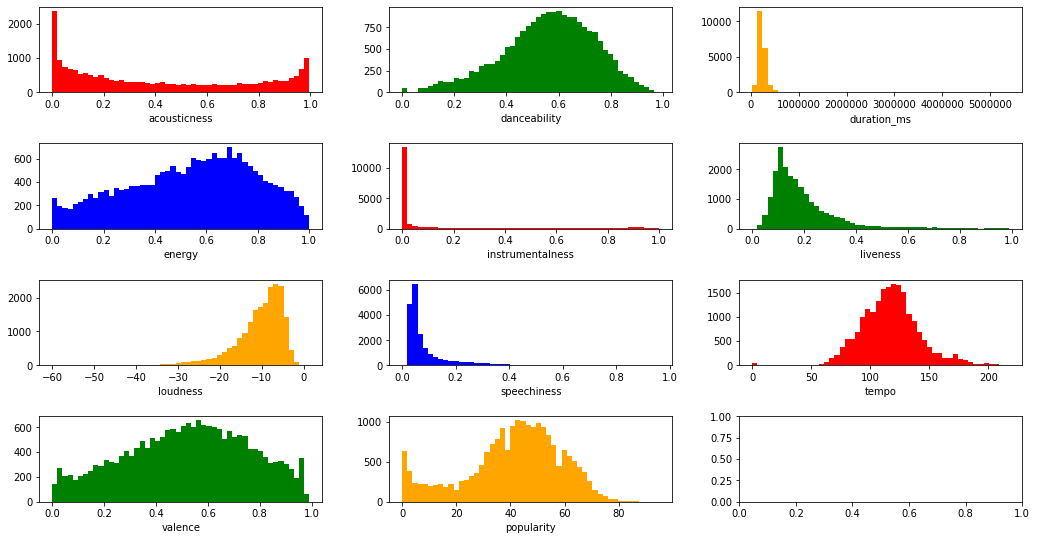

In [83]:
# similarly plotting the distribution of all continuous variables
fig, axs = plt.subplots(4, 3, figsize=(15, 8))
fig.tight_layout(pad=3.0)
axs = axs.reshape(12,)
i = 0
colors = ['red', 'green', 'orange', 'blue']
for feature in data.columns:
    subplot = axs[i]
    if(data[feature].dtype=='float64'):
        subplot.set(xlabel=feature)
        f, edge, plot = subplot.hist(data[feature], 50, color=colors[i%4])
        i = i+1;

#### We can observe that danceability, liveness, loudness, tempo, valence and popularity follow at least some type of distribution
#### There are potential outliers in duration, instrumentalness, tempo and speechiness

In [84]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,20340.000000,20340.000000,2.034000e+04,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000
mean,0.414848,0.560873,2.402499e+05,0.540173,0.144506,0.196689,-10.504063,0.091382,117.213290,0.520880,41.160601,5.417650,0.761799,15.853589
std,0.343911,0.175195,1.135769e+05,0.247024,0.276150,0.136134,5.741161,0.101664,24.587394,0.238933,17.804319,3.510466,0.425993,55.003083
min,0.000000,0.000000,2.786700e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.003802,0.000000,0.000000,1.000000
25%,0.090570,0.453000,1.867222e+05,0.357991,0.000002,0.109692,-13.045478,0.038800,101.329625,0.347464,32.000000,2.000000,1.000000,2.000000
50%,0.329183,0.574000,2.245380e+05,0.568000,0.000767,0.158082,-9.197000,0.052084,116.719390,0.532800,43.250000,6.000000,1.000000,4.000000
75%,0.747082,0.687000,2.697475e+05,0.731513,0.111065,0.236535,-6.400950,0.096245,130.550000,0.704000,53.666667,8.000000,1.000000,10.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.961651,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


Instrumentalness is heavily skewed towards 0 and provides no valuable data.
Duration of songs is between 2 and 3 x 10^5 seconds which is about 3 to 5 minutes. Clearly some outliers are present as song durations of 50 minutes is not a likely value. Hence we choose to drop these outliers.
<br>
We have picked 10 minutes to be the threshold value for songs we will be considering in our project

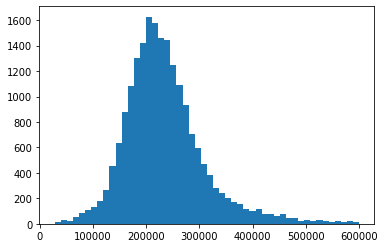

In [85]:
DUR_MAX = 6e+05
outliers = data[data['duration_ms'] > DUR_MAX].index
data.drop(outliers, inplace=True)
f, edge, plot = plt.hist(data['duration_ms'],50)

#### This shows a more normally distributed, slightly skewed data we can use for further analysis

In [86]:
# Dropping the instrumentalness column
data.drop('instrumentalness', axis=1, inplace=True)

#### Using Box Plots to detect the outliers in Speechiness

In [87]:
data['speechiness'].describe()

count    20161.000000
mean         0.090885
std          0.099322
min          0.000000
25%          0.038800
50%          0.052106
75%          0.096315
max          0.960000
Name: speechiness, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6a170b5f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6a17753250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6a170b5790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6a17953e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6a17953890>],
 'means': []}

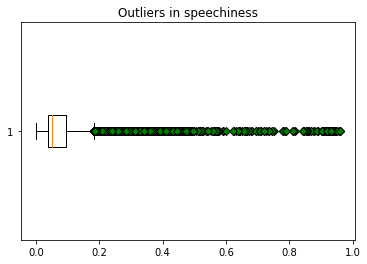

In [88]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Outliers in speechiness')
ax3.boxplot(data['speechiness'], flierprops=green_diamond, vert=False)

In [89]:
out_thresh = data['speechiness'].quantile(q=0.75) + 1.51 * data['speechiness'].quantile(q=0.25)
data[data['speechiness'] > out_thresh]['speechiness'].count()

3024

In [90]:
out_thresh

0.154902545

#### "Songs" with a speechiness higher than 0.154 are more likely to be other types of video mislabelled as music on YouTube. We will drop them

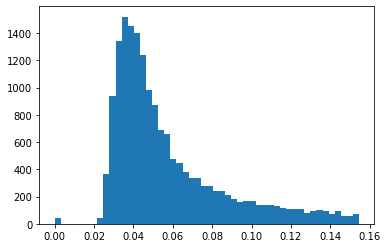

In [91]:
data.drop(data[data['speechiness'] > out_thresh].index, inplace=True)
f, e, plot = plt.hist(data['speechiness'], 50)

#### Now we can take another look at the columns of our data after having dealt with outliers and unecessary columns

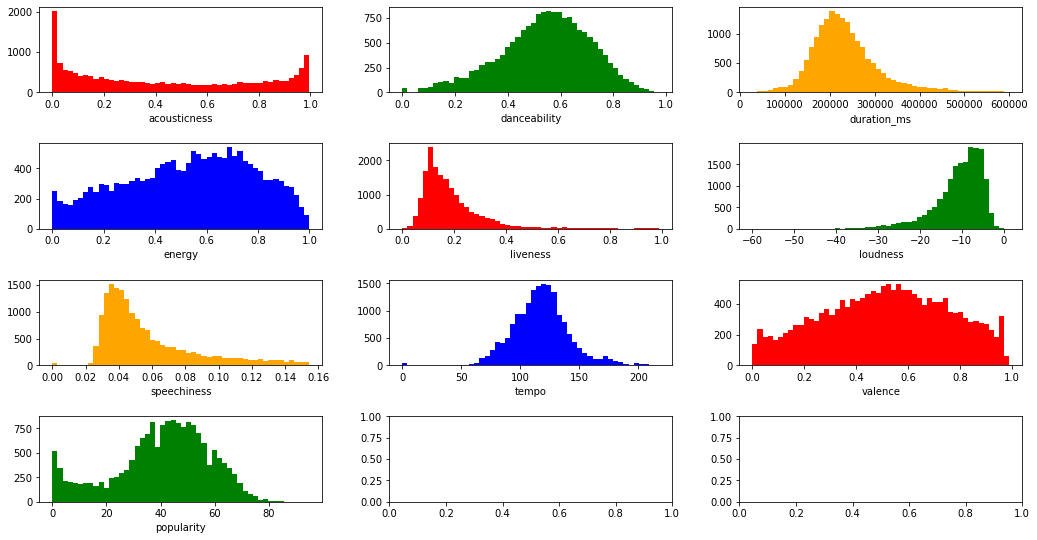

In [92]:
fig, axs = plt.subplots(4, 3, figsize=(15, 8))
fig.tight_layout(pad=3.0)
axs = axs.reshape(12,)
i = 0
colors = ['red', 'green', 'orange', 'blue']
for feature in data.columns:
    subplot = axs[i]
    if(data[feature].dtype=='float64'):
        subplot.set(xlabel=feature)
        f, edge, plot = subplot.hist(data[feature], 50, color=colors[i%4])
        i = i+1;

In [93]:
# SAVING THE NEW DATASET
data.to_csv('data_without_outliers.csv', index=False)

In [94]:
data.describe()

,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000
mean,0.431309,0.541597,235154.663676,0.529624,0.189490,-10.748800,0.057233,117.405750,0.514681,40.556845,5.422711,0.779133,16.830425
std,0.345915,0.170162,76238.529939,0.251294,0.126525,5.845012,0.028623,24.015411,0.244050,17.695630,3.481308,0.414843,58.126555
min,0.000000,0.000000,27867.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.003802,0.000000,0.000000,1.000000
25%,0.098820,0.438000,186553.750000,0.338500,0.109000,-13.295000,0.037200,102.799855,0.333000,31.111111,2.000000,1.000000,2.000000
50%,0.364620,0.555000,223393.705900,0.553000,0.155450,-9.515404,0.047000,117.268500,0.522000,43.000000,6.000000,1.000000,4.000000
75%,0.769000,0.663000,268637.200000,0.728000,0.227150,-6.561000,0.068100,130.283471,0.705000,53.000000,8.000000,1.000000,11.000000
max,0.996000,0.975000,600000.000000,1.000000,0.991000,1.342000,0.154608,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000
